# EDA

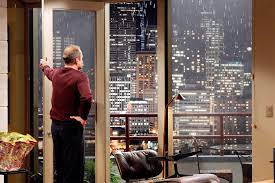

#### Understanding the Data

Import libraries and load data in .csv file

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv('./data/King_County_House_prices_dataset.csv')
df.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.000         3      1.000         1180   
1  6414100192   12/9/2014 538000.000         3      2.250         2570   
2  5631500400   2/25/2015 180000.000         2      1.000          770   
3  2487200875   12/9/2014 604000.000         4      3.000         1960   
4  1954400510   2/18/2015 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650   1.000         NaN 0.000  ...      7        1180            0.0   
1      7242   2.000       0.000 0.000  ...      7        2170          400.0   
2     10000   1.000       0.000 0.000  ...      6         770            0.0   
3      5000   1.000       0.000 0.000  ...      7        1050          910.0   
4      8080   1.000       0.000 0.000  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0     1955         0.000    98178 47.511 -122.257           1340        5650  
1     1951      1991.000    98125 47.721 -122.319           1690        7639  
2     1933           NaN    98028 47.738 -122.233           2720        8062  
3     1965         0.000    98136 47.521 -122.393           1360        5000  
4     1987         0.000    98074 47.617 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the info output, we can identify columns with a lot of missing data (waterfront and yr_renovated). And that most of the data appears to be consistent, i.e., there are a lot of float and integer columns, so not a mixture of e.g., integers and strings, which might indicate bad data. Exceptions are sqft_basement, date (maybe). But at this point, there seems no reason to drop a column because there it is too incomplete to be useful.

In [5]:
df.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count      21597.000   21597.000 21597.000  21597.000    21597.000   
mean  4580474287.771  540296.574     3.373      2.116     2080.322   
std   2876735715.748  367368.140     0.926      0.769      918.106   
min      1000102.000   78000.000     1.000      0.500      370.000   
25%   2123049175.000  322000.000     3.000      1.750     1430.000   
50%   3904930410.000  450000.000     3.000      2.250     1910.000   
75%   7308900490.000  645000.000     4.000      2.500     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21597.000 21597.000   19221.000 21534.000  21597.000 21597.000   
mean    15099.409     1.494       0.008     0.234      3.410     7.658   
std     41412.637     0.540       0.087     0.766      0.651     1.173   
min       520.000     1.000       0.000     0.000      1.000     3.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7618.000     1.500       0.000     0.000      3.000     7.000   
75%     10685.000     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.500       1.000     4.000      5.000    13.000   

       sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
count   21597.000 21597.000     17755.000 21597.000 21597.000 21597.000   
mean     1788.597  1971.000        83.637 98077.952    47.560  -122.214   
std       827.760    29.375       399.946    53.513     0.139     0.141   
min       370.000  1900.000         0.000 98001.000    47.156  -122.519   
25%      1190.000  1951.000         0.000 98033.000    47.471  -122.328   
50%      1560.000  1975.000         0.000 98065.000    47.572  -122.231   
75%      2210.000  1997.000         0.000 98118.000    47.678  -122.125   
max      9410.000  2015.000      2015.000 98199.000    47.778  -121.315   

       sqft_living15  sqft_lot15  
count      21597.000   21597.000  
mean        1986.620   12758.284  
std          685.230   27274.442  
min          399.000     651.000  
25%         1490.000    5100.000  
50%         1840.000    7620.000  
75%         2360.000   10083.000  
max         6210.000  871200.000

Mainly confirmation of what we saw with .info(). e.g., that there are problems with yr_renovated as numbers don't make sense for inputs of years. And sqft_basement doesn't show up because it isn't numeric.

In [6]:
df.describe(include=object)

date sqft_basement
count       21597         21597
unique        372           304
top     6/23/2014           0.0
freq          142         12826

Since we are not interested in sqft_basement (not relevant for our questions), just remove it for cleanliness

In [7]:
df.drop('sqft_basement', inplace=True, axis=1)
df

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014 221900.000         3      1.000         1180   
1      6414100192   12/9/2014 538000.000         3      2.250         2570   
2      5631500400   2/25/2015 180000.000         2      1.000          770   
3      2487200875   12/9/2014 604000.000         4      3.000         1960   
4      1954400510   2/18/2015 510000.000         3      2.000         1680   
...           ...         ...        ...       ...        ...          ...   
21592   263000018   5/21/2014 360000.000         3      2.500         1530   
21593  6600060120   2/23/2015 400000.000         4      2.500         2310   
21594  1523300141   6/23/2014 402101.000         2      0.750         1020   
21595   291310100   1/16/2015 400000.000         3      2.500         1600   
21596  1523300157  10/15/2014 325000.000         2      0.750         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650   1.000         NaN 0.000          3      7        1180   
1          7242   2.000       0.000 0.000          3      7        2170   
2         10000   1.000       0.000 0.000          3      6         770   
3          5000   1.000       0.000 0.000          5      7        1050   
4          8080   1.000       0.000 0.000          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131   3.000       0.000 0.000          3      8        1530   
21593      5813   2.000       0.000 0.000          3      8        2310   
21594      1350   2.000       0.000 0.000          3      7        1020   
21595      2388   2.000         NaN 0.000          3      8        1600   
21596      1076   2.000       0.000 0.000          3      7        1020   

       yr_built  yr_renovated  zipcode    lat     long  sqft_living15  \
0          1955         0.000    98178 47.511 -122.257           1340   
1          1951      1991.000    98125 47.721 -122.319           1690   
2          1933           NaN    98028 47.738 -122.233           2720   
3          1965         0.000    98136 47.521 -122.393           1360   
4          1987         0.000    98074 47.617 -122.045           1800   
...         ...           ...      ...    ...      ...            ...   
21592      2009         0.000    98103 47.699 -122.346           1530   
21593      2014         0.000    98146 47.511 -122.362           1830   
21594      2009         0.000    98144 47.594 -122.299           1020   
21595      2004         0.000    98027 47.535 -122.069           1410   
21596      2008         0.000    98144 47.594 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[21597 rows x 20 columns]

Check for non-unique ID numbers

In [8]:
df.id.value_counts(dropna=False)
# print duplicates to see why they exist
pd.concat(g for _, g in df.groupby("id") if len(g) > 1)

id        date      price  bedrooms  bathrooms  sqft_living  \
2494      1000102   9/16/2014 280000.000         6      3.000         2400   
2495      1000102   4/22/2015 300000.000         6      3.000         2400   
16800     7200179  10/16/2014 150000.000         2      1.000          840   
16801     7200179   4/24/2015 175000.000         2      1.000          840   
11421   109200390   8/20/2014 245000.000         3      1.750         1480   
...           ...         ...        ...       ...        ...          ...   
6340   9828200460    1/6/2015 430000.000         2      1.000          700   
15185  9834200305   7/16/2014 350000.000         3      1.000         1790   
15186  9834200305   2/10/2015 615000.000         3      1.000         1790   
1084   9834200885   7/17/2014 360000.000         4      2.500         2080   
1085   9834200885   4/20/2015 550000.000         4      2.500         2080   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2494       9373   2.000         NaN 0.000          3      7        2400   
2495       9373   2.000       0.000 0.000          3      7        2400   
16800     12750   1.000       0.000 0.000          3      6         840   
16801     12750   1.000       0.000 0.000          3      6         840   
11421      3900   1.000       0.000 0.000          4      7        1480   
...         ...     ...         ...   ...        ...    ...         ...   
6340       4800   1.000       0.000 0.000          3      7         700   
15185      3876   1.500       0.000 0.000          5      7        1090   
15186      3876   1.500       0.000 0.000          5      7        1090   
1084       4080   1.000       0.000 0.000          5      7        1040   
1085       4080   1.000       0.000 0.000          5      7        1040   

       yr_built  yr_renovated  zipcode    lat     long  sqft_living15  \
2494       1991         0.000    98002 47.326 -122.214           2060   
2495       1991         0.000    98002 47.326 -122.214           2060   
16800      1925         0.000    98055 47.484 -122.211           1480   
16801      1925           NaN    98055 47.484 -122.211           1480   
11421      1980         0.000    98023 47.298 -122.367           1830   
...         ...           ...      ...    ...      ...            ...   
6340       1922         0.000    98122 47.615 -122.300           1440   
15185      1904         0.000    98144 47.575 -122.288           1360   
15186      1904         0.000    98144 47.575 -122.288           1360   
1084       1962         0.000    98144 47.572 -122.290           1340   
1085       1962         0.000    98144 47.572 -122.290           1340   

       sqft_lot15  
2494         7316  
2495         7316  
16800        6969  
16801        6969  
11421        6956  
...           ...  
6340         4800  
15185        4080  
15186        4080  
1084         4080  
1085         4080  

[353 rows x 20 columns]

A quick look suggests that duplicates really are duplicates and not different records with mislabeled ID values. As a first quick fix, deleting duplicates. 

In [9]:
# identify duplicates using "id" and keep first record, drop the others
df = df.drop_duplicates(subset=["id"], keep='first')

Convert date stings to datetime format

In [10]:
# checking that date variables are okay
# df[~df["date"].str.contains('/')].date.value_counts() 
# result is empty, so likely no badly formatted values

# convert dates to datetime
df['date'] = df.date.astype('datetime64[ns]')

df.date.describe()

count                   21420
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

#### Research Questions and Hypothesis Generation

##### Client description
| Erin Robinson       | Buyer       | Invest in poor neighborhood, buying & selling, costs back + little profit, socially responsible  
__Assumptions__: wants to help families (several bedrooms); willing to renovate; in urban area for access to public transit; they don't need the cheapest houses, but the best deals (price/sqft);

##### What does the client want to know?
Where should they concentrate their search, in order to get the best price/sqft?</br>

Old questions:</br>
X What house should they invest in to help low income households have a home? </br>
X Where should they concentrate their search? </br>
X What should they expect to pay for a house in a cheaper neighbourhood (price and price/sqft)

##### Related Hypotheses and Indicators
|Hypotheses |Indicator|
|---|---|
|More recent data is more relevant, as prices are changing rapidly | price, $/sqft sale date|
|For a low price/sqft, the most relevant criteria will be location (vs. sqft, number rooms, renovated, etc.). | comparison |
|Cheaper houses will be concentrated in particular neighbourhoods, where the client should focus their search. | geolocation | 
|X To keep prices low (price/sqft), the client will have to buy unrenovated houses. | renovated vs price/sqft |
|X An unrenovated house in expensive NB == renovated house in cheaper neighbourhodd. | geolocation, renovated-not |

Variables of interest: 'id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'yr_renovated', 'zipcode', 'lat', 'long'


#### General exploration and cleaning of the data set
First, have a look at distribution of a few key variables.

count     21420.000
mean     540739.304
std      367931.110
min       78000.000
25%      322500.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64


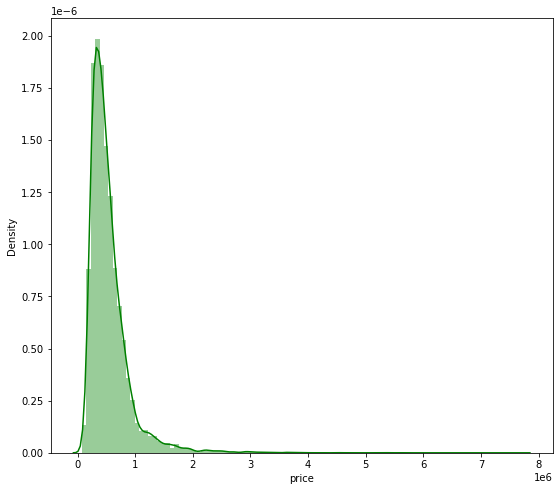

In [11]:
print(df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

count     21420.000
mean     540739.304
std      367931.110
min       78000.000
25%      322500.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64


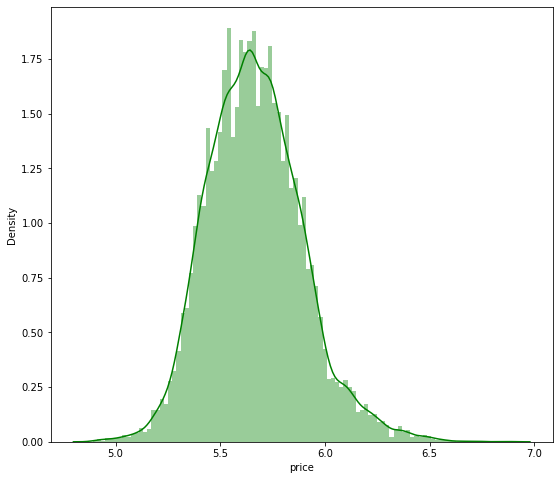

In [12]:
# have a look at how taking log can make distribution normal
print(df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(np.log10(df['price']), color='g', bins=100, hist_kws={'alpha': 0.4});

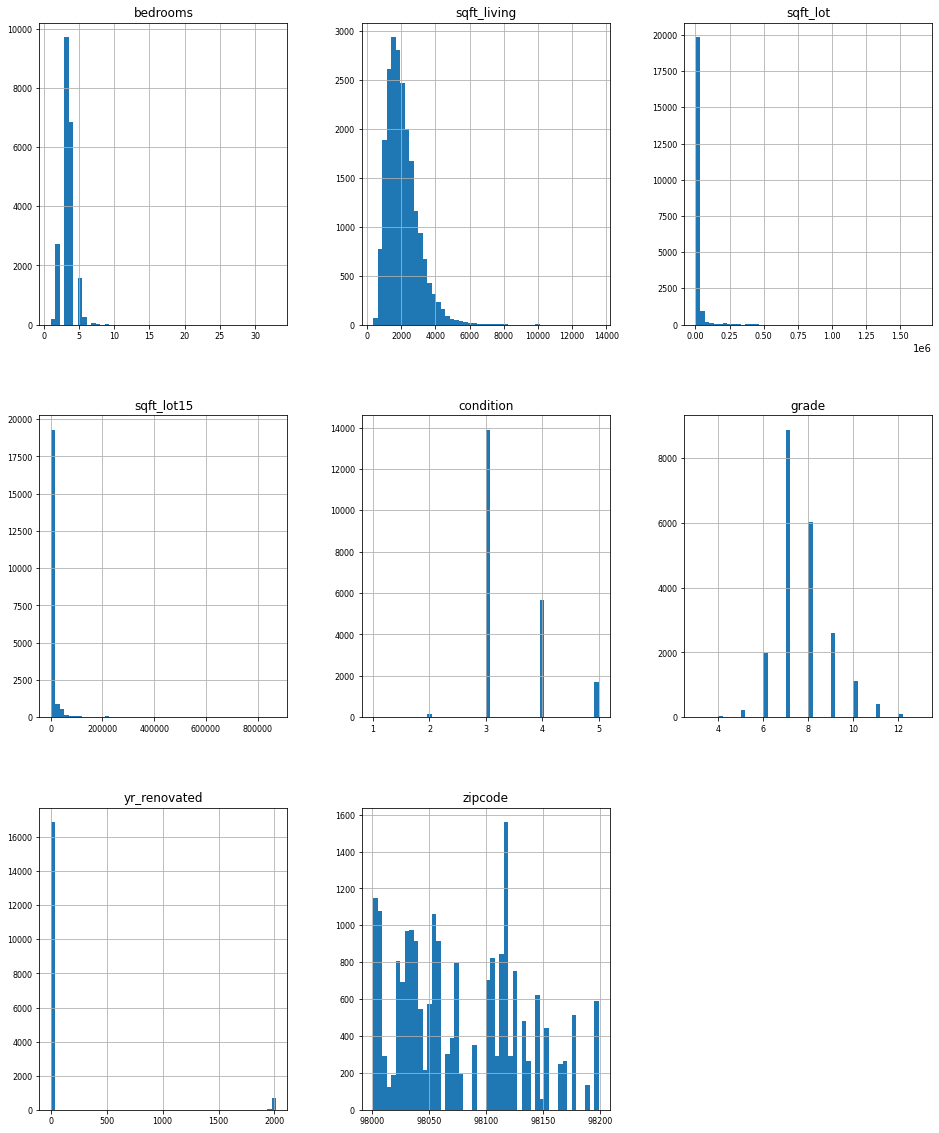

In [13]:
# plot the rest together 
vars_in = ['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_lot15', 'condition', 'grade', 'yr_renovated', 'zipcode', 'lat', 'long']

# only plot variables that make sense
vars_plot = ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_lot15', 'condition', 'grade', 'yr_renovated', 'zipcode']
df[vars_plot[1:]].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); #

Let's look at correlations, first visually vs House Price...

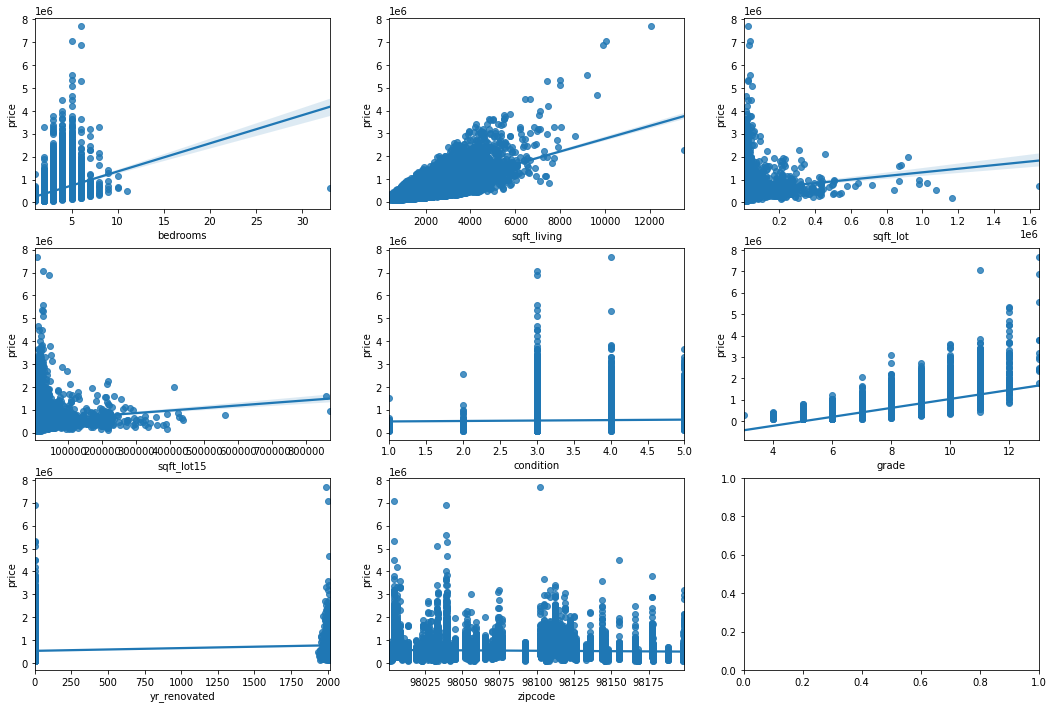

In [14]:
fig, ax = plt.subplots(round(len(vars_plot) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(vars_plot[1:]):
        sns.regplot(x=vars_plot[i+1],y='price', data=df[vars_plot], ax=ax)

"Condition", "grade" and "bedrooms" don't seem to have any correlation with price. There seems to be an outlier in "bedrooms", "sqft_living" and "sqft_lot", and the zero value in "yr_renovated" presents us from really looking at the data. Also, we are only interested in houses that are not too expensive, so cutoff prices at 5,000,000, as there are very few that are that expensive.

Remove outlier in "bedrooms", "sqft_living", "sqft_lot", and set 0 to NaN in "yr_renovated".

Add variable price/sqft, using "sqft_living".

In [15]:
# first drop really expensive houses, to reduce dataset to houses that will interest client (probably still too expensive)
df = df[df.price < 5e6]

In [16]:
# check outlier in bedrooms
df.query("bedrooms > 15")
# there's only one house with more than 15 bedrooms. Considering how low the price is, this is presumably a mistake. 
# Setting value to NaN so that we can keep the record
df.loc[(df.id==2402100895), 'bedrooms'] = np.nan
df[df.id==2402100895]


id       date      price  bedrooms  bathrooms  sqft_living  \
15856  2402100895 2014-06-25 640000.000       NaN      1.750         1620   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
15856      6000   1.000       0.000 0.000          5      7        1040   

       yr_built  yr_renovated  zipcode    lat     long  sqft_living15  \
15856      1947         0.000    98103 47.688 -122.331           1330   

       sqft_lot15  
15856        4700

In [17]:
# check outlier in sqft_living
df.query("sqft_living > 13000")
# remove as this big of a house (and expensive) does not interest client
df = df[df.sqft_living < 13000]
df.query("sqft_living > 13000")

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

In [18]:
# check outlier in sqft_lot
# df.query("sqft_lot > 1.6e6")
# remove as this big of a house (and expensive) does not interest client
# df = df[df.sqft_lot > 1.6e6]

# keep as the price may be of interest


In [19]:
# check outlier in sqft_lot15
df.query("sqft_lot15 > 7e5")
# remove as this big of a house (and expensive) does not interest client
# df = df[df.sqft_lot > 7e5]

# keep as the price may be of interest

id       date       price  bedrooms  bathrooms  sqft_living  \
9705    225079036 2015-01-07  937500.000     4.000      4.000         5545   
20436  1125079111 2015-04-15 1600000.000     4.000      5.500         6530   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9705     871200   2.000       0.000 0.000          3     11        3605   
20436    871200   2.000       0.000 2.000          3     11        6530   

       yr_built  yr_renovated  zipcode    lat     long  sqft_living15  \
9705       2003         0.000    98014 47.676 -121.882           3420   
20436      2008         0.000    98014 47.664 -121.878           1280   

       sqft_lot15  
9705       871200  
20436      858132

In [20]:
# change 0 in yr_renovated to NaN
#df.query("yr_renovated == 0")
df.loc[(df.yr_renovated==0), 'yr_renovated'] = np.nan


In [21]:
# add a column for $/sqft
df.eval('price_sqft = price/sqft_living', inplace = True)
vars_plot.append('price_sqft')
df

id       date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13 221900.000     3.000      1.000         1180   
1      6414100192 2014-12-09 538000.000     3.000      2.250         2570   
2      5631500400 2015-02-25 180000.000     2.000      1.000          770   
3      2487200875 2014-12-09 604000.000     4.000      3.000         1960   
4      1954400510 2015-02-18 510000.000     3.000      2.000         1680   
...           ...        ...        ...       ...        ...          ...   
21592   263000018 2014-05-21 360000.000     3.000      2.500         1530   
21593  6600060120 2015-02-23 400000.000     4.000      2.500         2310   
21594  1523300141 2014-06-23 402101.000     2.000      0.750         1020   
21595   291310100 2015-01-16 400000.000     3.000      2.500         1600   
21596  1523300157 2014-10-15 325000.000     2.000      0.750         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  yr_built  \
0          5650   1.000         NaN 0.000  ...      7        1180      1955   
1          7242   2.000       0.000 0.000  ...      7        2170      1951   
2         10000   1.000       0.000 0.000  ...      6         770      1933   
3          5000   1.000       0.000 0.000  ...      7        1050      1965   
4          8080   1.000       0.000 0.000  ...      8        1680      1987   
...         ...     ...         ...   ...  ...    ...         ...       ...   
21592      1131   3.000       0.000 0.000  ...      8        1530      2009   
21593      5813   2.000       0.000 0.000  ...      8        2310      2014   
21594      1350   2.000       0.000 0.000  ...      7        1020      2009   
21595      2388   2.000         NaN 0.000  ...      8        1600      2004   
21596      1076   2.000       0.000 0.000  ...      7        1020      2008   

       yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
0               NaN    98178 47.511 -122.257           1340        5650   
1          1991.000    98125 47.721 -122.319           1690        7639   
2               NaN    98028 47.738 -122.233           2720        8062   
3               NaN    98136 47.521 -122.393           1360        5000   
4               NaN    98074 47.617 -122.045           1800        7503   
...             ...      ...    ...      ...            ...         ...   
21592           NaN    98103 47.699 -122.346           1530        1509   
21593           NaN    98146 47.511 -122.362           1830        7200   
21594           NaN    98144 47.594 -122.299           1020        2007   
21595           NaN    98027 47.535 -122.069           1410        1287   
21596           NaN    98144 47.594 -122.299           1020        1357   

       price_sqft  
0         188.051  
1         209.339  
2         233.766  
3         308.163  
4         303.571  
...           ...  
21592     235.294  
21593     173.160  
21594     394.217  
21595     250.000  
21596     318.627  

[21412 rows x 21 columns]

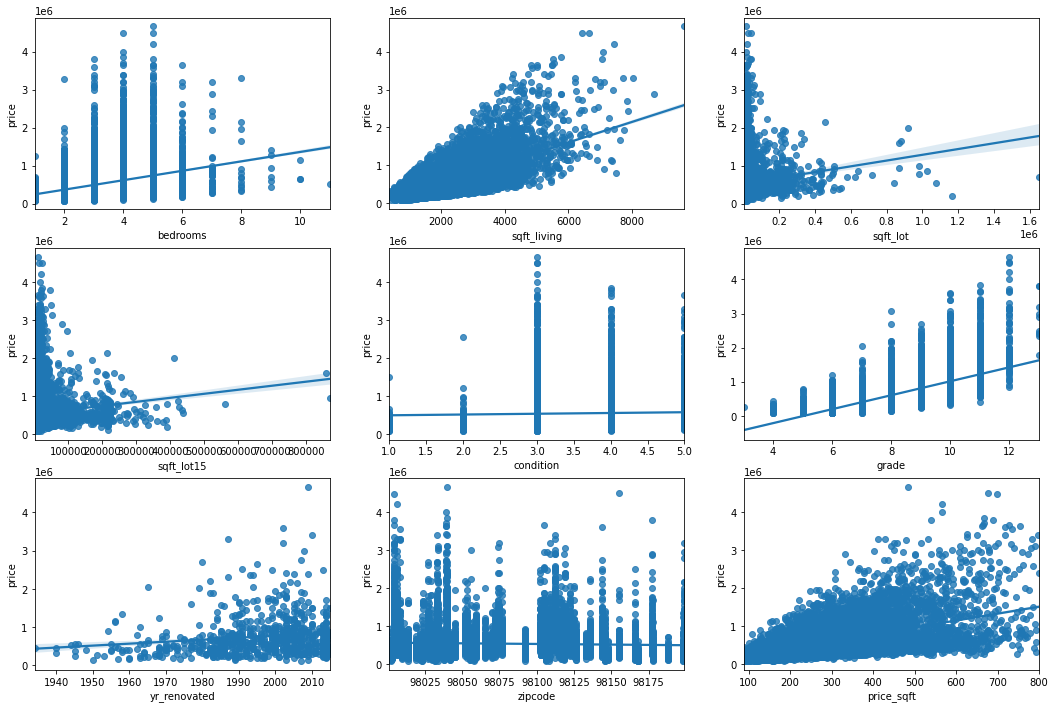

In [22]:
fig, ax = plt.subplots(round(len(vars_plot) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(vars_plot[1:]):
        sns.regplot(x=vars_plot[i+1],y='price', data=df[vars_plot], ax=ax)

Correlation matrix between variables of interest

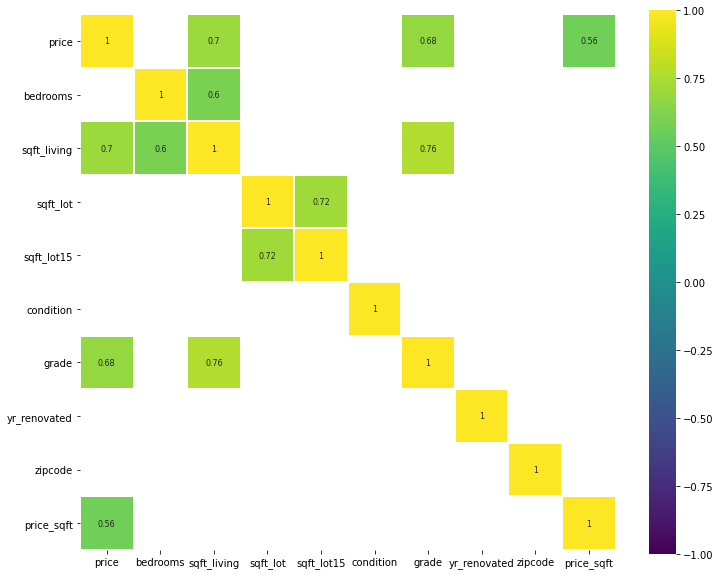

In [23]:
corr = df[vars_plot].corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

All correlations are positive.

Price is correlated with price/sqft (not surprising), grade (maybe because "if a house is expensive it must be nice"), and sqft_living (suggesting price/sqft is a good metric).

Grade is also correlated with sqft_living ("a big house must be nice"). And sqft_living is correlated with bedrooms (more space, more bedrooms).

But why is e.g., bedrooms in turn not correlated with price or grade?

Sqft of the lot is correlated with the lots of the neighbours, suggesting that neigbhourhoods have similar lot sizes (as expected).


In [24]:
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.000     3.000      1.000         1180   
1  6414100192 2014-12-09 538000.000     3.000      2.250         2570   
2  5631500400 2015-02-25 180000.000     2.000      1.000          770   
3  2487200875 2014-12-09 604000.000     4.000      3.000         1960   
4  1954400510 2015-02-18 510000.000     3.000      2.000         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  yr_built  \
0      5650   1.000         NaN 0.000  ...      7        1180      1955   
1      7242   2.000       0.000 0.000  ...      7        2170      1951   
2     10000   1.000       0.000 0.000  ...      6         770      1933   
3      5000   1.000       0.000 0.000  ...      7        1050      1965   
4      8080   1.000       0.000 0.000  ...      8        1680      1987   

   yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
0           NaN    98178 47.511 -122.257           1340        5650   
1      1991.000    98125 47.721 -122.319           1690        7639   
2           NaN    98028 47.738 -122.233           2720        8062   
3           NaN    98136 47.521 -122.393           1360        5000   
4           NaN    98074 47.617 -122.045           1800        7503   

   price_sqft  
0     188.051  
1     209.339  
2     233.766  
3     308.163  
4     303.571  

[5 rows x 21 columns]

#### Explore the dataset to address hypotheses

##### First we want to reduce the dataset to focus on what is relevant to the client. We have already stated that the client is only interested in:

- family homes, > 2 bedrooms
- urban areas, low sqft_lot15
- a low $/sqft



__Assumptions__: wants to help families (several bedrooms); willing to renovate; in urban area for access to public transit; they don't need the cheapest houses, but the best deals (price/sqft);




First determine a cutoff for what defines an urban area, and a low $/sqft:

<AxesSubplot:xlabel='price_sqft', ylabel='sqft_lot15'>

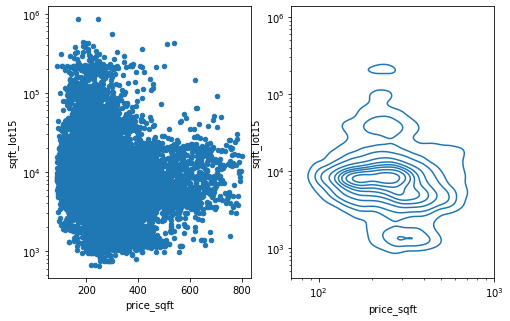

In [25]:
f, axs = plt.subplots(1, 2)
df.plot.scatter(x='price_sqft', y='sqft_lot15', ax = axs[0], logy=True)#, logx=True)
sns.kdeplot(data=df, x='price_sqft', y='sqft_lot15', log_scale=True, ax = axs[1])

This plot suggests that most houses have a lot size less than 20 000 sqft, and a price of less than 400$/sqft. Start out being very strict, and only include lots below 10 000 sqft, and prices below 200 $/sqft.

In [26]:
df_sel = df[(df.bedrooms > 2) & (df.sqft_lot15 < 10000) & (df.price_sqft < 200)]
# df_sel = df[(df.bedrooms > 2) & (df.sqft_lot15 < 20000) & (df.price_sqft < 400)]

Based on this targeted dataset...

##### __Check hypothesis 1__ 
More recent data is more relevant, as prices are changing rapidly. Plotting time series of sale prices and $/sqft to look for any trends.

<AxesSubplot:xlabel='date', ylabel='price_sqft'>

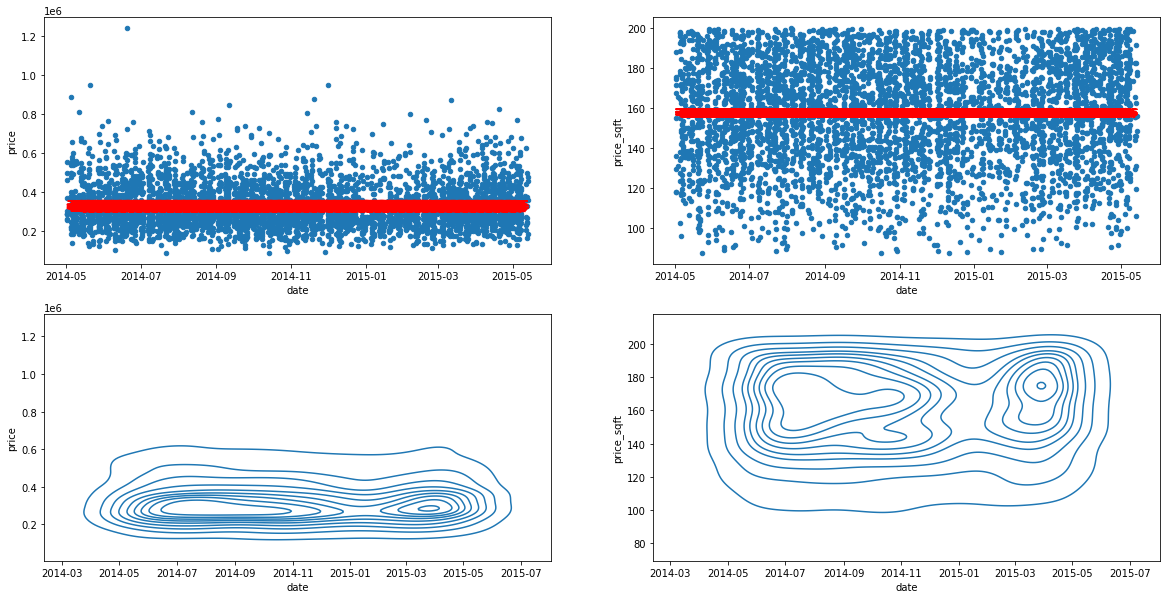

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
axs = axs.ravel()
df_sel.plot.scatter(x='date', y='price', ax=axs[0])
axs[0].plot(df_sel.date, np.poly1d(np.polyfit(range(len(df_sel.date)), df_sel.price, 1))(range(len(df_sel.date))), 'r--')

df_sel.plot.scatter(x='date', y='price_sqft', ax=axs[1])
axs[1].plot(df_sel.date, np.poly1d(np.polyfit(range(len(df_sel.date)), df_sel.price_sqft, 1))(range(len(df_sel.date))), 'r--')

sns.kdeplot(data=df_sel, x='date', y='price', log_scale=False, ax = axs[2])
sns.kdeplot(data=df_sel, x='date', y='price_sqft', log_scale=False, ax = axs[3])


These results show that the first hypothesis was wrong, there is no apparent trend in house prices over the dataset. There was a drop in sales at the start of 2015, but this is not relevant here.

##### __Onto hypothesis 2__
For a low price/sqft, the most relevant criteria will be location (vs. sqft, number rooms, renovated, etc.). | comparison. Start with correlation of $/sqft with relevant variables:

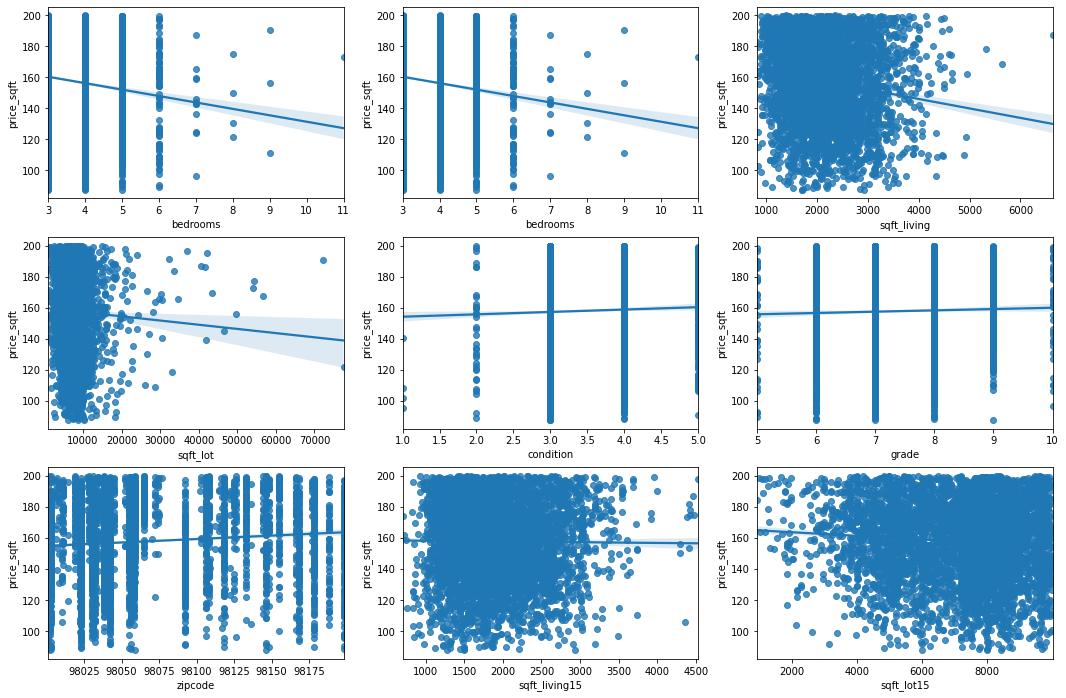

In [28]:
vars_sel = ['bedrooms', 'bedrooms', 'sqft_living',
            'sqft_lot', 'condition', 'grade', 'zipcode', 'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(round(len(vars_plot) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(vars_plot):
        sns.regplot(x=vars_sel[i],y='price_sqft', data=df_sel, ax=ax)

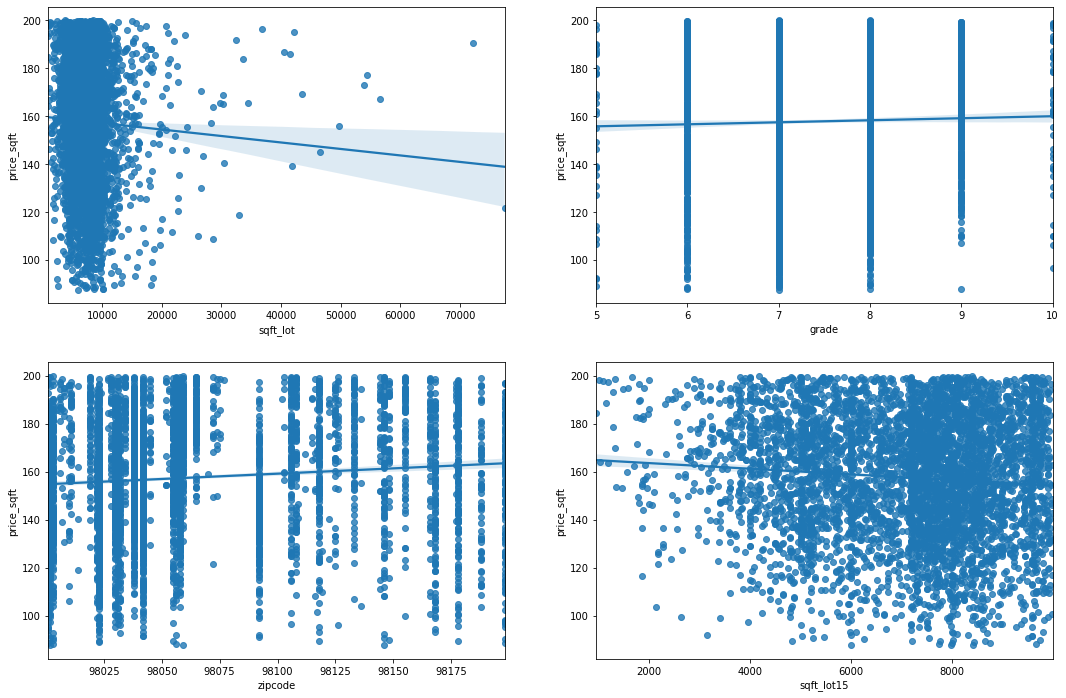

In [29]:
#  a smaller version for presenting
vars_sel = ['sqft_lot', 'grade', 'zipcode', 'sqft_lot15']

fig, ax = plt.subplots(2, 2, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(vars_plot):
        sns.regplot(x=vars_sel[i],y='price_sqft', data=df_sel, ax=ax)

Generally speaking, there is no clear relationship between sqft_price and the others (as seen above in the correlation). However, can still get some insight:
- really big lots (>20000 sqft) are expensive /sqft
- can maybe say something similar for living space > 3000 sqft
- The highest condition and grade values require a > about 120 $/sqft
- really low and really high postal codes may be linked to the lowest $/sqft
- neighbourhoods with the smallest lots (< 4000 sqft) are expensive (i.e., there aren't many cheap options)

To compare, try a mapped distribution of $/sqft, to see if location is important.

##### __Onto hypothesis 3__

In [30]:
# notes: works better with uniform dot size; what about heatmap?


fig = px.scatter_mapbox(df_sel, lat="lat", lon="long",
                        color='price_sqft', 
                        color_continuous_scale=px.colors.sequential.haline_r, 
                        opacity=0.5,
                        size_max=6,
                        zoom=9,
                        height=600)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()
# "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or "stamen-watercolor" 

This is still a lot of data, and hard to pick out areas with consistently lower $/sqft. Try taking mean and median to simplify the results:

In [31]:
fig = px.scatter_mapbox(df_sel.groupby('zipcode').mean(), lat="lat", lon="long",
                        color='price_sqft', 
                        color_continuous_scale=px.colors.sequential.haline_r, 
                        opacity=1,
                        size='price_sqft',
                        zoom=9,
                        height=600)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

In [32]:
fig = px.scatter_mapbox(df_sel.groupby('zipcode').median(), lat="lat", lon="long",
                        color='price_sqft', 
                        color_continuous_scale=px.colors.sequential.haline_r, 
                        opacity=1,
                        size='price_sqft',
                        zoom=9,
                        height=600)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

What about Heatmaps?

In [33]:
# full dataset
fig = px.density_heatmap(df, y="lat", x="long",
                        z='price_sqft', 
                        histfunc = 'avg',
                        color_continuous_scale=px.colors.sequential.haline_r, 
                        height=600,
                        nbinsx=100,
                        nbinsy=100)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

In [34]:
# reduced dataset
fig = px.density_heatmap(df_sel, y="lat", x="long",
                        z='price_sqft', 
                        histfunc = 'avg',
                        color_continuous_scale=px.colors.sequential.haline_r, 
                        height=600,
                        nbinsx=100,
                        nbinsy=100)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

In [35]:
# plot zipcodes to see if we can easily isolate the neighbourhoods of interest.
fig = px.scatter_mapbox(df_sel.groupby('zipcode').median().reset_index(), lat="lat", lon="long",
                        color='zipcode', 
                        color_continuous_scale=px.colors.sequential.haline_r, 
                        opacity=1,
                        size='zipcode',
                        hover_name='zipcode',
                        zoom=9,
                        height=600)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

From the scatter mean/median and heatmaps, there is a clear North-South gradient or separation. Therefore, focusing on areas south of downtown Seattle, (lat < 47.5) appears to be the best way to reduce the $/sqft. It it is not very easy to isolate these areas by zipcode.

However, 98119, located north of Seattle is actually the lowest average $/sqft. Therefore, recommend starting here for very focused search, and then moving to south after.

#### Extra plots for the presentation

In [36]:
fig = px.scatter_mapbox(df, lat="lat", lon="long",
                        color='price_sqft', 
                        color_continuous_scale=px.colors.sequential.haline_r, 
                        opacity=0.5,
                        size_max=6,
                        zoom=9,
                        height=500)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()
# "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or "stamen-watercolor" 

In [40]:
# narrow version
fig = px.scatter_mapbox(df, lat="lat", lon="long",
                        color='price_sqft', 
                        color_continuous_scale=px.colors.sequential.haline_r, 
                        opacity=0.5,
                        size_max=6,
                        zoom=8.5,
                        width=900,
                        height=600)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()
# "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or "stamen-watercolor" 